# Zuber Project

## Introduction
I'm working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. My task is to find patterns in the available information. I want to understand passenger preferences and the impact of external factors on rides.

Working with a database, I will analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

## Prepare the Data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
#Read in dataframes
taxis = pd.read_csv('/datasets/project_sql_result_01.csv')
taxis

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
trips = pd.read_csv('/datasets/project_sql_result_04.csv')
trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [5]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
taxis.isna().sum()

company_name    0
trips_amount    0
dtype: int64

In [7]:
trips.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

In [8]:
taxis.duplicated().sum()

0

In [9]:
trips.duplicated().sum()

0

### Conclusion
- We can see that there are no missing values or duplicates.
- The column data types are also valid and don't need to be changed.

## Exploratory Data Analysis

- Identify the top 10 neighborhoods in terms of drop-offs
- Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- Draw conclusions based on each graph and explain the results

In [10]:
trips.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


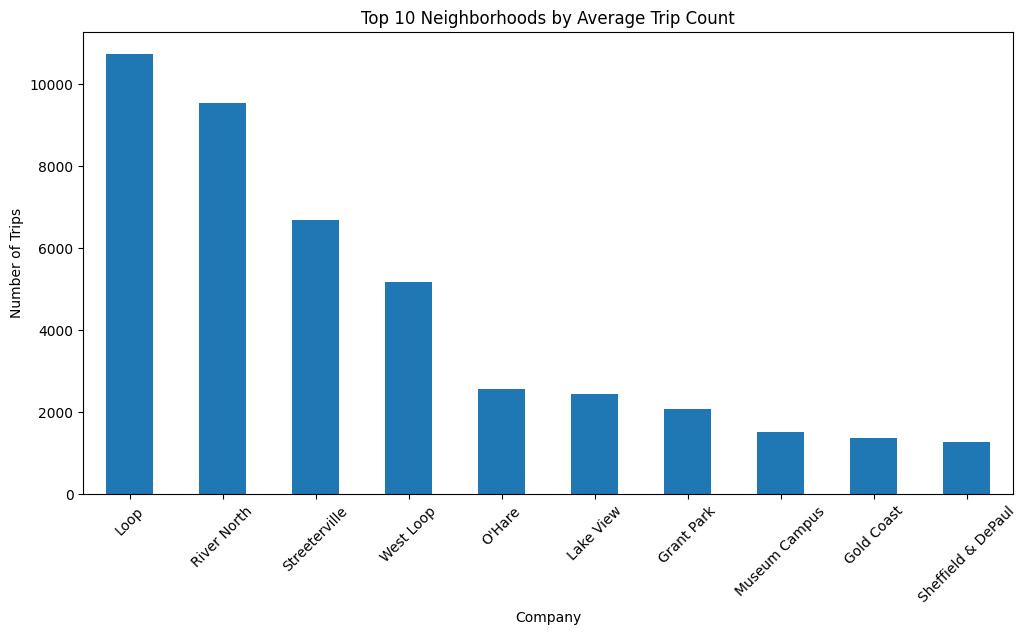

In [11]:
trips.head(10).plot(kind = 'bar',
                   x = 'dropoff_location_name',
                   y = 'average_trips',
                   figsize = (12,6),
                   xlabel = 'Company',
                   ylabel = 'Number of Trips',
                   title = 'Top 10 Neighborhoods by Average Trip Count',
                   legend = False)
plt.xticks(rotation = 45)
plt.show()

The Loop neighborhood has the most average number of trips followed by River North and Streeterville.

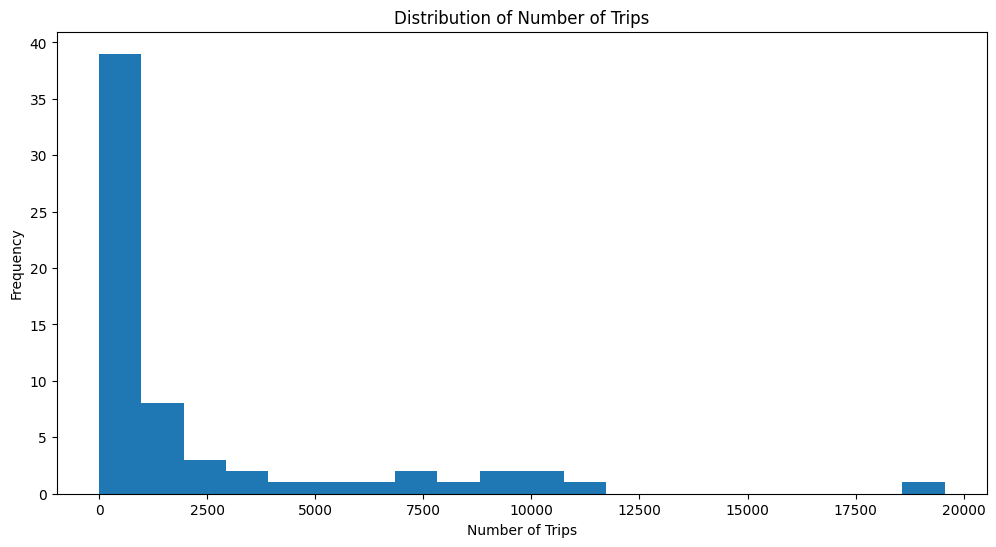

In [12]:
taxis['trips_amount'].plot(kind = 'hist',
                          title = 'Distribution of Number of Trips',
                          bins = 20,
                          figsize = (12,6))

plt.xlabel('Number of Trips')
plt.show()

From what we can see, the amount of trips taxi companies usually have for 2 days are between 0 and 2500. There are outliers in our data with some companies having over 5000 and even almost 20000.

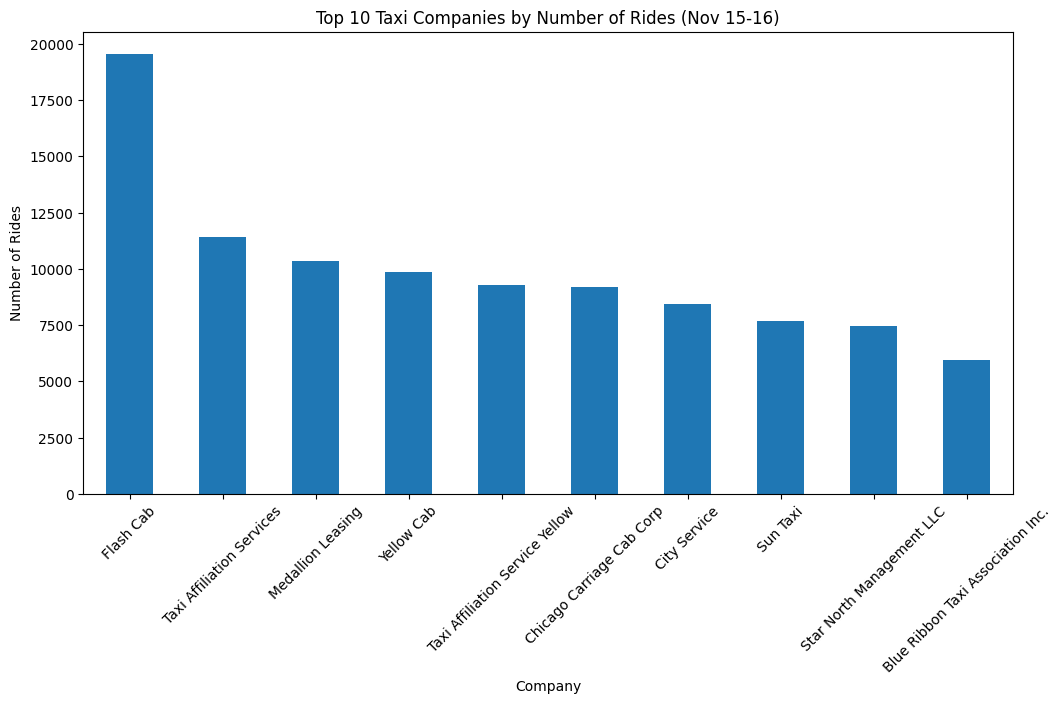

In [13]:
taxis.head(10).plot(kind = 'bar',
                  x = 'company_name',
                  y = 'trips_amount',
                  xlabel = 'Company',
                  ylabel = 'Number of Rides',
                  title = 'Top 10 Taxi Companies by Number of Rides (Nov 15-16)',
                  figsize = (12, 6),
                  legend = False)

plt.xticks(rotation = 45)
plt.show()

Flash Cab has by far the most amount of rides with nearly 75,000 more than the second most, Taxi Affiliation Services. We can say that Flash Cab is the most popular of the Chicago neighborhoods.

### Conclusion
- We found that the Loop, River North, and Streeterville neighborhoods have the most amount of trips in the Chicago area.
- The number of trips for 2 days are mostly in the range of 0-2500 trips.
- Flash Cab was the most popular taxi company followed by Taxi Affiliation Services and Medallion Leasing. 

## Testing Hypothesis
Test the hypothesis:

"The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

Decide where to set the significance level (alpha) on your own.

Explain how you formed the null and alternative hypotheses what criterion you used to test the hypotheses and why

In [14]:
rides = pd.read_csv('/datasets/project_sql_result_07.csv')
rides

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [15]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [16]:
rides.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [17]:
rides.duplicated().sum()

197

In [18]:
rides[rides.duplicated()].head(10)

,start_ts,weather_conditions,duration_seconds
62,2017-11-11 06:00:00,Good,1260.0
74,2017-11-11 08:00:00,Good,1380.0
76,2017-11-04 09:00:00,Good,1380.0
117,2017-11-11 07:00:00,Good,1380.0
119,2017-11-04 14:00:00,Good,3300.0
125,2017-11-11 08:00:00,Good,1380.0
126,2017-11-11 09:00:00,Good,1380.0
130,2017-11-11 10:00:00,Good,1260.0
179,2017-11-11 06:00:00,Good,1260.0
190,2017-11-04 08:00:00,Good,1323.0


In [19]:
rides = rides.drop_duplicates()
rides.duplicated().sum()

0

In [20]:
rides['start_ts'] = pd.to_datetime(rides['start_ts'], format='%Y-%m-%d %H:%M:%S')
rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            871 non-null    datetime64[ns]
 1   weather_conditions  871 non-null    object        
 2   duration_seconds    871 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.2+ KB


/tmp/ipykernel_50/3558596249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rides['start_ts'] = pd.to_datetime(rides['start_ts'], format='%Y-%m-%d %H:%M:%S')


Null Hypothesis: The average duration of rides from the Loop to O'Hare International Airport <b>does not</b> change on rainy Saturdays.

Alternative Hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [21]:
good_rides = rides[(rides["start_ts"].dt.weekday == 5) & (rides["weather_conditions"] == "Good")]["duration_seconds"]
bad_rides = rides[(rides["start_ts"].dt.weekday == 5) & (rides["weather_conditions"] != "Good")]["duration_seconds"]

alpha = 0.05
results = st.ttest_ind(good_rides, bad_rides)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value: 7.397770692813658e-08
We reject the null hypothesis


We find that we can reject null hypothesis which means we can say that the average duration of rides <b>changes</b> on rainy Saturdays.

## Conclusion
For preparing the data:
- We can see that there are no missing values or duplicates.
- The column data types are also valid and don't need to be changed.

For exploratory data analysis:
- We found that the Loop, River North, and Streeterville neighborhoods have the most amount of trips in the Chicago area.
- The number of trips for 2 days are mostly in the range of 0-2500 trips.
- Flash Cab was the most popular taxi company followed by Taxi Affiliation Services and Medallion Leasing. 

For testing our hypothesis:
- We find that we can reject null hypothesis which means we can say that the average duration of rides does change on rainy Saturdays.